In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/kaggle/input/twitter-sentimental-analysis/twitter.csv')

# View first few rows
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
print(df.columns)        
print(df.isnull().sum()) 
df.info()                


Index(['id', 'label', 'tweet'], dtype='object')
id       0
label    0
tweet    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
print(df.columns)


Index(['id', 'label', 'tweet'], dtype='object')


In [9]:
# Apply the cleaning function to the 'tweet' column
df['clean_text'] = df['tweet'].apply(clean_text)

# View cleaned tweets
df[['tweet', 'clean_text']].head()


,tweet,clean_text
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunction
1,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause dont offer wheelc...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,love u take u time ur
4,factsguide: society now #motivation,factsguide society


In [12]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:0000:01


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create the analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the function to get sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [14]:
df['vader_sentiment'] = df['clean_text'].apply(get_sentiment)
df[['tweet', 'clean_text', 'vader_sentiment']].head()


,tweet,clean_text,vader_sentiment
0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunction,negative
1,@user @user thanks for #lyft credit i can't us...,thanks credit cant use cause dont offer wheelc...,positive
2,bihday your majesty,bihday majesty,neutral
3,#model i love u take with u all the time in ...,love u take u time ur,positive
4,factsguide: society now #motivation,factsguide society,neutral


In [15]:
# Count how many tweets in each sentiment category
df['vader_sentiment'].value_counts()


vader_sentiment
positive    13654
neutral     12516
negative     5792
Name: count, dtype: int64

In [17]:
# Make sure sentiment column is treated as category
df['vader_sentiment'] = pd.Categorical(df['vader_sentiment'], categories=['positive', 'neutral', 'negative'], ordered=True)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


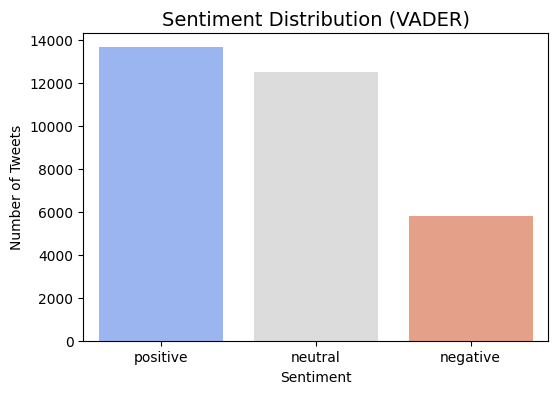

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='vader_sentiment', palette='coolwarm')
plt.title("Sentiment Distribution (VADER)", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


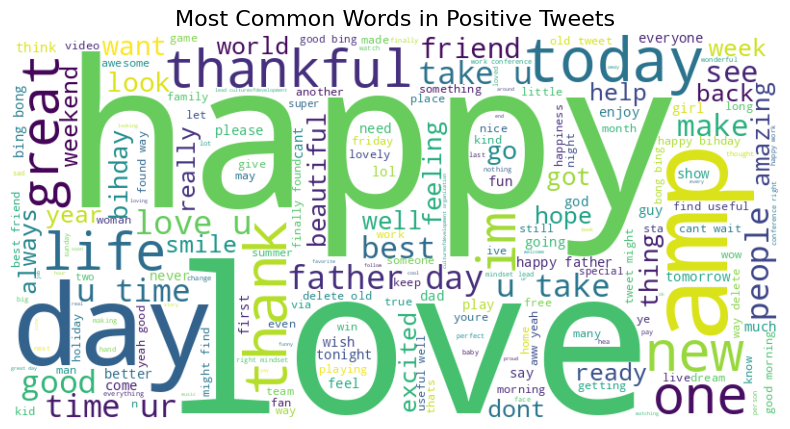

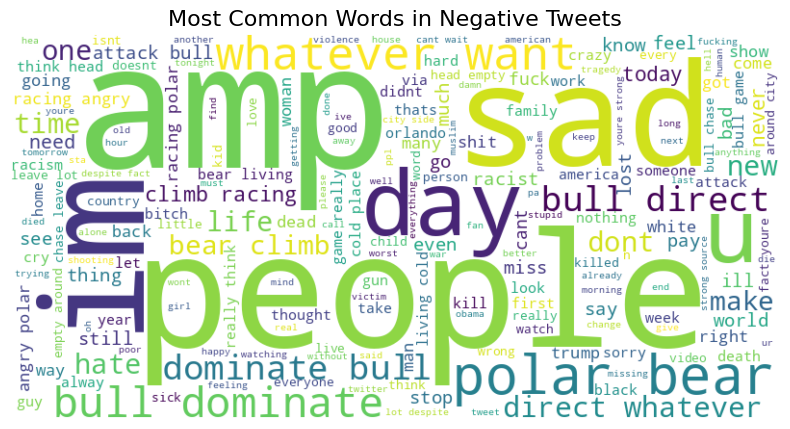

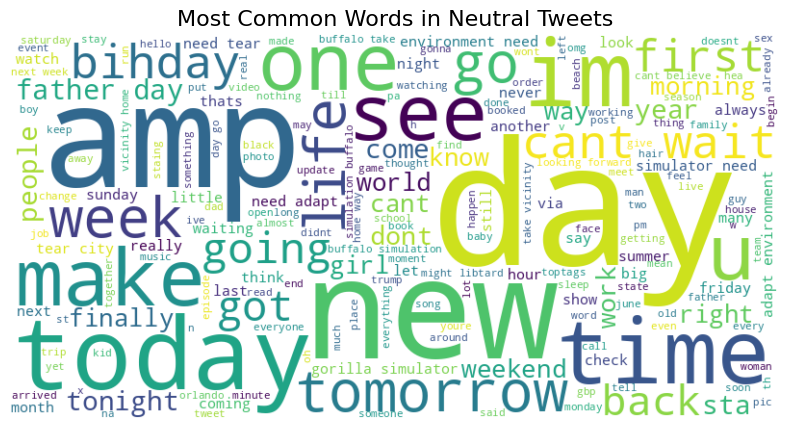

In [19]:
from wordcloud import WordCloud

# Combine all clean_text for each sentiment
positive_words = " ".join(df[df['vader_sentiment'] == 'positive']['clean_text'])
negative_words = " ".join(df[df['vader_sentiment'] == 'negative']['clean_text'])
neutral_words  = " ".join(df[df['vader_sentiment'] == 'neutral']['clean_text'])

# Create and show word clouds
def plot_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(positive_words, "Most Common Words in Positive Tweets")
plot_wordcloud(negative_words, "Most Common Words in Negative Tweets")
plot_wordcloud(neutral_words,  "Most Common Words in Neutral Tweets")


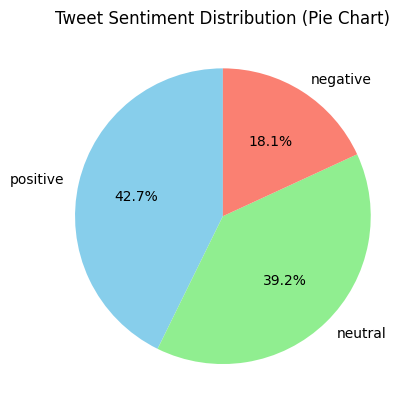

In [20]:
# Pie chart
df['vader_sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'], startangle=90)
plt.ylabel('')
plt.title("Tweet Sentiment Distribution (Pie Chart)")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


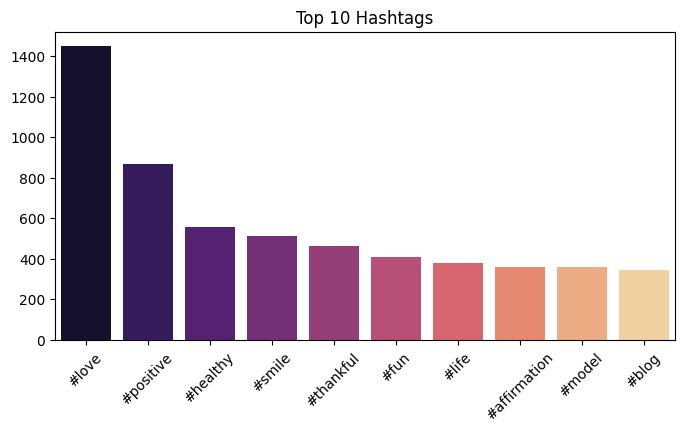

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


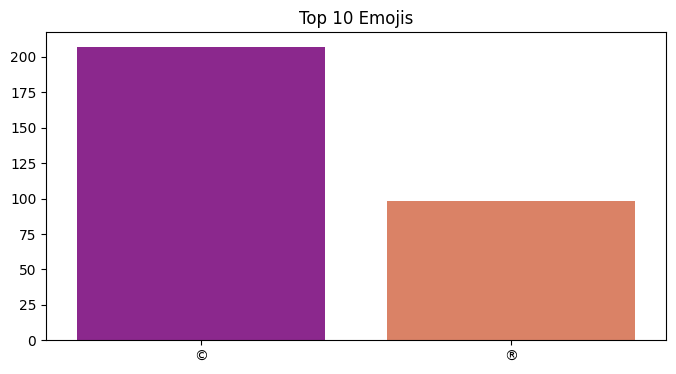

In [22]:
import emoji
from collections import Counter

def extract_hashtags(text):
    return [part for part in text.split() if part.startswith("#")]

def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Extract from original tweet column (not cleaned)
all_hashtags = df['tweet'].apply(extract_hashtags).sum()
all_emojis = df['tweet'].apply(extract_emojis).sum()

# Top 10 hashtags
hashtag_freq = Counter(all_hashtags).most_common(10)
emoji_freq = Counter(all_emojis).most_common(10)

# Plot hashtags
tags, counts = zip(*hashtag_freq)
plt.figure(figsize=(8,4))
sns.barplot(x=list(tags), y=list(counts), palette='magma')
plt.title("Top 10 Hashtags")
plt.xticks(rotation=45)
plt.show()

# Plot emojis
emojis, counts = zip(*emoji_freq)
plt.figure(figsize=(8,4))
sns.barplot(x=list(emojis), y=list(counts), palette='plasma')
plt.title("Top 10 Emojis")
plt.show()


In [23]:
# Save results to a CSV file
df.to_csv('/kaggle/working/final_sentiment_analysis.csv', index=False)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Map sentiment labels to numbers
df['label_num'] = df['vader_sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1})

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label_num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.89      0.65      0.75      1134
           0       0.83      0.98      0.90      2498
           1       0.93      0.89      0.91      2761

    accuracy                           0.88      6393
   macro avg       0.88      0.84      0.85      6393
weighted avg       0.88      0.88      0.88      6393



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode: positive → 2, neutral → 1, negative → 0
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['vader_sentiment'])

# Optional: See label mapping
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'negative': 0, 'neutral': 1, 'positive': 2}


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
max_words = 10000
max_len = 50

# Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(sequences, maxlen=max_len)

# Labels
y = df['label_encoded'].values


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 sentiment classes
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-19 17:21:05.282696: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.5543 - loss: 0.8990 - val_accuracy: 0.8619 - val_loss: 0.3805
Epoch 2/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9186 - loss: 0.2587 - val_accuracy: 0.9005 - val_loss: 0.3047
Epoch 3/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9617 - loss: 0.1385 - val_accuracy: 0.9026 - val_loss: 0.3222
Epoch 4/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.9723 - loss: 0.1026 - val_accuracy: 0.8991 - val_loss: 0.3516
Epoch 5/5
320/320 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.9762 - loss: 0.0890 - val_accuracy: 0.9026 - val_loss: 0.4552


In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9012 - loss: 0.4412
Test Accuracy: 0.90


In [34]:
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Decode back to sentiment labels
predicted_sentiments = label_encoder.inverse_transform(y_pred_labels)
actual_sentiments = label_encoder.inverse_transform(y_test)

# View sample predictions
for i in range(5):
    print(f"Tweet: {df['clean_text'].iloc[i]}")
    print(f"Predicted: {predicted_sentiments[i]}, Actual: {actual_sentiments[i]}")
    print("-----")


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Tweet: father dysfunctional selfish drag kid dysfunction
Predicted: positive, Actual: positive
-----
Tweet: thanks credit cant use cause dont offer wheelchair van pdx
Predicted: neutral, Actual: neutral
-----
Tweet: bihday majesty
Predicted: negative, Actual: negative
-----
Tweet: love u take u time ur
Predicted: neutral, Actual: neutral
-----
Tweet: factsguide society
Predicted: neutral, Actual: neutral
-----


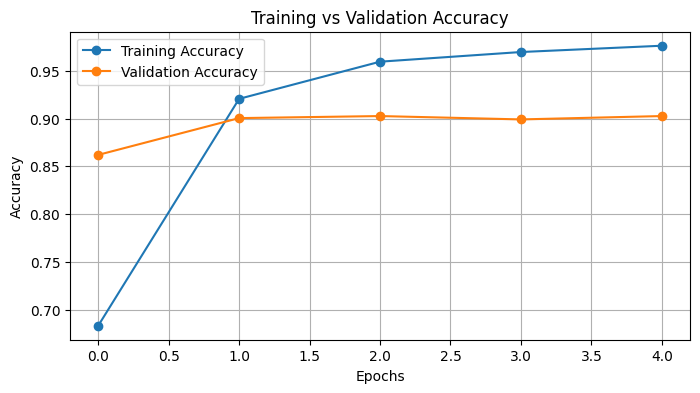

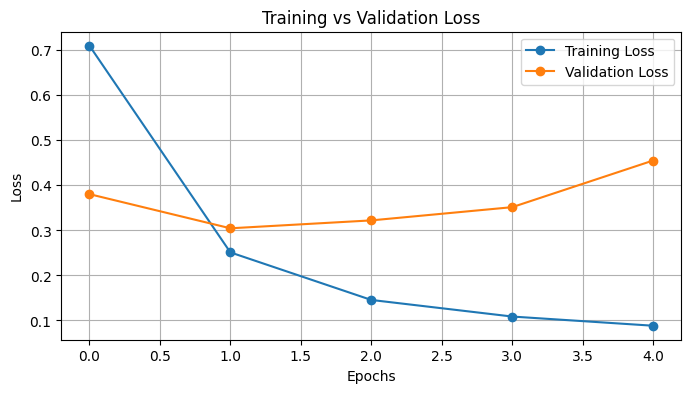

In [35]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


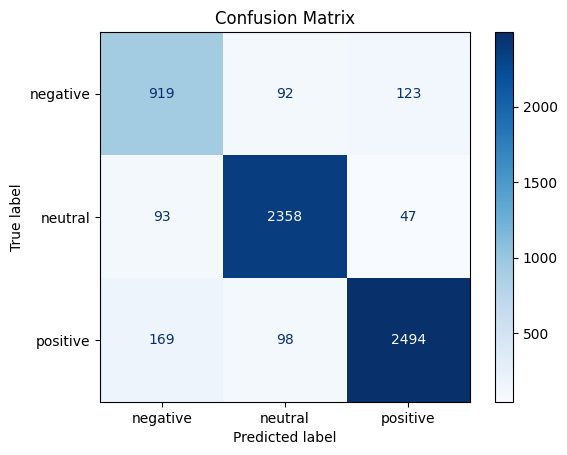

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
